# K-NN in python: search for the best k



## 1- Load the required modeules



In [10]:
import numpy as np                     # Llibreria matemÃƒÂ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline                 

## 2- Load the data



In [11]:
# Loading the dataset
dataset = pd.read_csv('dataset_preprocessed.csv')
dataset = dataset.iloc[:,1:]
# Separate data from labels
X = dataset.drop(["ethnicity","icu_admit_source","icu_stay_type","icu_type","apache_3j_bodysystem","apache_2_bodysystem","hospital_death"],axis=1)
X = pd.get_dummies(X)
y = dataset["hospital_death"]
(X_train, X_test, y_train, y_test) = cv.train_test_split(X,y,test_size=0.3,random_state=1)
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [12]:
p = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=p,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)
print("Best Parameters=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Parameters= {'n_neighbors': 3, 'weights': 'distance'} Accuracy= 0.9003364943407769


0.8947302697302697


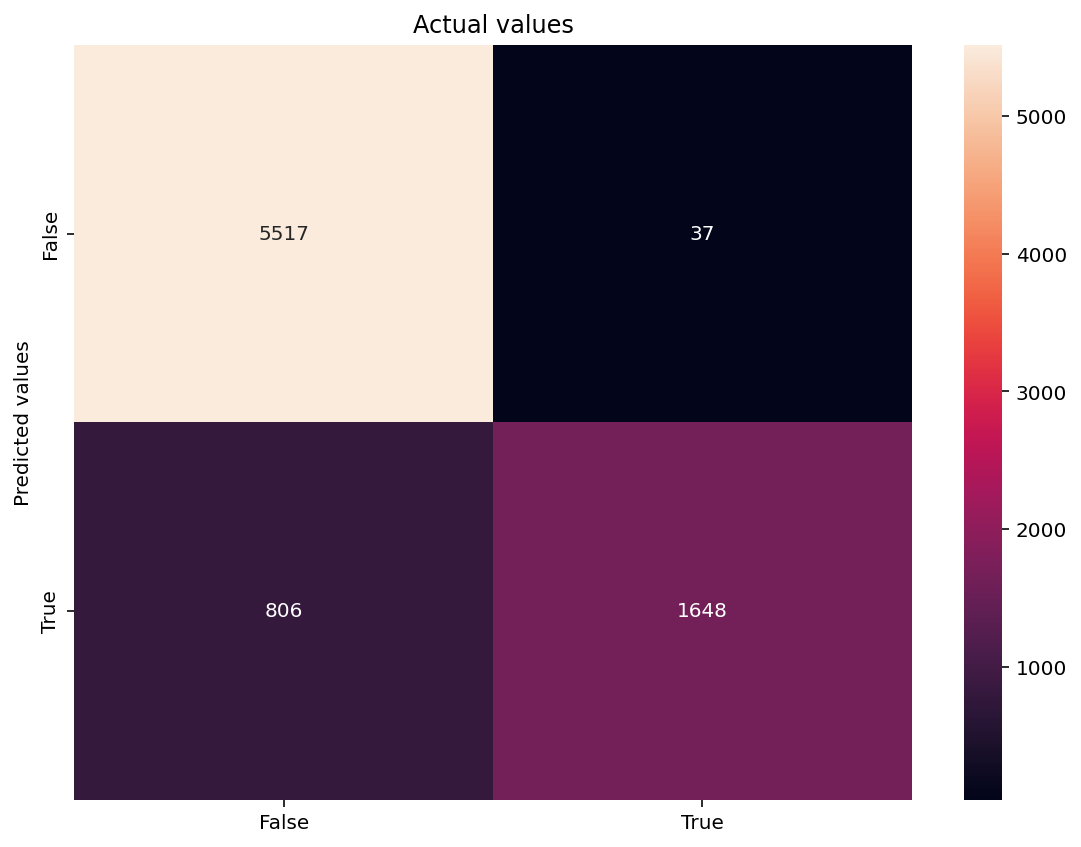

Accuracy: 0.8947302697302697

              precision    recall  f1-score   support

       False       0.87      0.99      0.93      5554
        True       0.98      0.67      0.80      2454

    accuracy                           0.89      8008
   macro avg       0.93      0.83      0.86      8008
weighted avg       0.90      0.89      0.89      8008



In [13]:
y_pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = ".0f",xticklabels = clf.classes_,yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print()
print(sklearn.metrics.classification_report(y_test, y_pred))